In [9]:
import json as js
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


In [2]:
with open(r"C:\Users\Jhanvi\Downloads\SuicideWatch_posts_reddit.txt","r") as f:  # os will automitacally stop providing resources if we use with
    a=f.read()
a1=js.loads(a)

In [3]:
df=pd.DataFrame(a1)

In [4]:
df.head()

,post_id,title,author,timestamp,body,score,total_comments,comments
0,ma96y1,It’s kinda funny how quickly one can go from “...,None,2021-03-21T23:32:52,,3806,129,"[{'comment_id': 'grrf9pk', 'author': 'Spo_okys..."
1,f9d5go,Anyone else not want to die and not want to ki...,cleopatra_97,2020-02-25T16:51:01,,3034,314,"[{'comment_id': 'fiqyg5h', 'author': 'k0zmo', ..."
2,kbqsnq,My mom died 3 hours ago,_crustysocks_,2020-12-12T15:22:24,I thought id be ready for this some day but i ...,2866,161,"[{'comment_id': 'gfjdbtr', 'author': 'Mister_g..."
3,e8gjky,Raped in front of my girlfriend. feeling like ...,Fantastic-Profession,2019-12-09T21:41:43,"\n\nI don't know what to say or do, I just fe...",2820,349,"[{'comment_id': 'facfc2b', 'author': None, 'ti..."
4,jnrz57,'If you were actually suicidal you'd have kill...,throwaway-or-smthn,2020-11-04T06:48:44,FUCK YOU FUCK YOU FUCK YOU \nYOU ABSOLUTE DUMB...,2775,146,"[{'comment_id': 'gb3dgis', 'author': 'Throwawa..."


In [5]:
df.columns

Index(['post_id', 'title', 'author', 'timestamp', 'body', 'score',
       'total_comments', 'comments'],
      dtype='object')

In [6]:
df.isna().sum()

post_id             0
title               0
author            169
timestamp           0
body                0
score               0
total_comments      0
comments            0
dtype: int64

In [7]:
# I included only basic preprocessing tasks 
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))  # Remove non-alphanumeric characters
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Combine title and body columns
df['text'] = df['title'] + ' ' + df['body']

# Apply preprocessing to text column
df['processed_text'] = df['text'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])



In [15]:
# Elbow method for selecting the optimal number of clusters
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

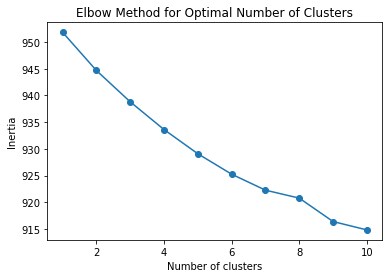

In [16]:
import matplotlib.pyplot as plt
# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [17]:
#from visual inspection
optimal_num_clusters=8
# Clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_

# Add cluster labels to DataFrame
df['cluster'] = cluster_labels


In [19]:
df.head(10)

,post_id,title,author,timestamp,body,score,total_comments,comments,text,processed_text,cluster
0,ma96y1,It’s kinda funny how quickly one can go from “...,None,2021-03-21T23:32:52,,3806,129,"[{'comment_id': 'grrf9pk', 'author': 'Spo_okys...",It’s kinda funny how quickly one can go from “...,kinda funny quickly one go today great product...,7
1,f9d5go,Anyone else not want to die and not want to ki...,cleopatra_97,2020-02-25T16:51:01,,3034,314,"[{'comment_id': 'fiqyg5h', 'author': 'k0zmo', ...",Anyone else not want to die and not want to ki...,anyone else want die want kill wish could stop...,7
2,kbqsnq,My mom died 3 hours ago,_crustysocks_,2020-12-12T15:22:24,I thought id be ready for this some day but i ...,2866,161,"[{'comment_id': 'gfjdbtr', 'author': 'Mister_g...",My mom died 3 hours ago I thought id be ready ...,mom died 3 hours ago thought id ready day real...,3
3,e8gjky,Raped in front of my girlfriend. feeling like ...,Fantastic-Profession,2019-12-09T21:41:43,"\n\nI don't know what to say or do, I just fe...",2820,349,"[{'comment_id': 'facfc2b', 'author': None, 'ti...",Raped in front of my girlfriend. feeling like ...,raped front girlfriend feeling like giving don...,3
4,jnrz57,'If you were actually suicidal you'd have kill...,throwaway-or-smthn,2020-11-04T06:48:44,FUCK YOU FUCK YOU FUCK YOU \nYOU ABSOLUTE DUMB...,2775,146,"[{'comment_id': 'gb3dgis', 'author': 'Throwawa...",'If you were actually suicidal you'd have kill...,actually suicidal youd killed already tell any...,1
5,juklnk,I like sleeping because it's the closest thing...,throwwowwoy,2020-11-15T11:37:29,,2774,139,"[{'comment_id': 'gcdz6dy', 'author': 'letmeliv...",I like sleeping because it's the closest thing...,like sleeping closest thing existing experience,2
6,n77bnn,I fucking hate/despise/loathe how money is eve...,phosTR,2021-05-07T19:52:57,I'm tired of seeing all these fucking crypto s...,2706,191,"[{'comment_id': 'gxbeoqw', 'author': 'amustafa...",I fucking hate/despise/loathe how money is eve...,fucking hatedespiseloathe money everything fuc...,1
7,hy8bh6,"I wish I could walk into a hospital, throw my ...",Bittybot5000,2020-07-26T14:58:10,But of course they’d lock me up in the mental ...,2671,77,"[{'comment_id': 'fzb6ae6', 'author': None, 'ti...","I wish I could walk into a hospital, throw my ...",wish could walk hospital throw arms say organs...,7
8,kgxxg9,"Dear mom, i really dont care about my grades r...",None,2020-12-20T17:19:56,,2650,143,"[{'comment_id': 'gghw4py', 'author': 'casketcr...","Dear mom, i really dont care about my grades r...",dear mom really dont care grades right im tryi...,3
9,l49603,Someone sarcastically told me to kill myself a...,freddy_plays_csgo,2021-01-24T22:20:53,"He just got silent , then without saying anyth...",2592,104,"[{'comment_id': 'gkn4zem', 'author': None, 'ti...",Someone sarcastically told me to kill myself a...,someone sarcastically told kill replied tried ...,2


In [20]:
tfidf_matrix.shape

(991, 8168)

In [11]:
# pca = PCA(n_components=2)
# tfidf_reduced = pca.fit_transform(tfidf_matrix)

svd = TruncatedSVD(n_components=7)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# Print the explained variance ratio of each component
print("Explained variance ratio of each component:", svd.explained_variance_ratio_)

# # Print the explained variance ratio of each component
# print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

Explained variance ratio of each component: [0.00851692 0.01104678 0.00912931 0.00794332 0.00739339 0.00700091
 0.00660025]


In [13]:
tfidf_dense = tfidf_matrix.toarray()
pca = PCA(n_components=10)
tfidf_reduced = pca.fit_transform(tfidf_dense)
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

Explained variance ratio of each component: [0.01140937 0.01055471 0.00912923 0.00795867 0.00740232 0.00662167
 0.00639056 0.00629165 0.00588734 0.00556523]


In [ ]:
# its becomes difficult to visualise this data using PCA as none of the component is able to explain maximum variance